In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('cleaned_df.xlsx')

In [3]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [4]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,Type,Size,year,week,Type_A,Type_B,Type_C
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,...,0.0,211.096358,8.106,A,151315,2010,5,1,0,0
1,1,1,2010-02-12,46039.49,1,38.51,2.548,0.0,0.0,0.0,...,0.0,211.242170,8.106,A,151315,2010,6,1,0,0
2,1,1,2010-02-19,41595.55,0,39.93,2.514,0.0,0.0,0.0,...,0.0,211.289143,8.106,A,151315,2010,7,1,0,0
3,1,1,2010-02-26,19403.54,0,46.63,2.561,0.0,0.0,0.0,...,0.0,211.319643,8.106,A,151315,2010,8,1,0,0
4,1,1,2010-03-05,21827.90,0,46.50,2.625,0.0,0.0,0.0,...,0.0,211.350143,8.106,A,151315,2010,9,1,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  int64         
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

## Statistical Analysis

We have 3 types of stores; Type-A, Type-B, and Type-C. We want to check if the weekly sales are significantly different among all groups. For this we will be using ANOVA technique to compare that if the average weekly sales for the groups are significantly different.

In [8]:
type_A_sales = df[df['Type']=='A']['Weekly_Sales']
type_B_sales = df[df['Type']=='B']['Weekly_Sales']
type_C_sales = df[df['Type']=='C']['Weekly_Sales']

In [9]:
# one way anova testing
from scipy.stats import f_oneway

f_oneway(type_A_sales,type_B_sales, type_C_sales)

F_onewayResult(statistic=7764.426217449252, pvalue=0.0)

`p-value = 0.0 < 0.05` which indicates that the average weekly sales are statistically significant different for each store type. Atleast one group mean is significantly different from others. We can apply tukey's test to check by which groups means the null hypothesis (means for all groups are same) was rejected and to also observe which group means are significantly different

In [11]:
# Tukey's test

from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['Weekly_Sales'], groups=df['Type'], alpha=0.05)

print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj    lower       upper    reject
--------------------------------------------------------------
     A      B  -7862.4921   0.0  -8033.9424  -7691.0417   True
     A      C -10580.0355   0.0 -10857.2206 -10302.8504   True
     B      C  -2717.5434   0.0  -3001.9088  -2433.1781   True
--------------------------------------------------------------


The output of Tukey's test shows that the  difference of average weekly sales for each pair of groups is statistically significantly different and average weekly sales is not same for any two groups.

Previously we saw that the departments 92, 95 and 38 had the most weekly sales, so it would be interesting to see if the average weekly sales are statistically different or not for these departments.

First, I would compare the average weekly sales for departments 92 and 95 as these two are the top 2 departments and we will do this by using t-test. For the comparsion for all top 3 departments we will use anova technique as we did above.

In [14]:
# t test to check department 92 and 95 weekly sales difference
dept_92 = df[df['Dept'] == 92]['Weekly_Sales']
dept_95 = df[df['Dept'] == 95]['Weekly_Sales']
dept_38 = df[df['Dept'] == 38]['Weekly_Sales']

from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(dept_92, dept_95, equal_var = False)

print(f"T statistic: {t_stat:.4f}\nP-value: {p_val:.4f}")

T statistic: 6.9104
P-value: 0.0000


So t statistic value is very far from the zero and p-value is also less than 0.05 so we conlude that the average weekly sales for departments 92 and 95 are statistically significantly different.

In [16]:
# anova testing to compare top3 departments
f_oneway(dept_92, dept_95, dept_38)

F_onewayResult(statistic=218.87100647431365, pvalue=1.0170824511315987e-94)

p-value is very quite small which indicates that the average weekly sales are statistically significantly different for all top 3 departments.

In [18]:
# Tukey's test

from statsmodels.stats.multicomp import pairwise_tukeyhsd

top_departs_df = df[df['Dept'].isin([92, 95, 38])]

tukey = pairwise_tukeyhsd(endog=top_departs_df['Weekly_Sales'], groups=top_departs_df['Dept'], alpha=0.05)

print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
    38     92  14114.251   0.0 12518.2533 15710.2486   True
    38     95  8733.8035   0.0  7137.8058 10329.8012   True
    92     95 -5380.4475   0.0 -6976.4451 -3784.4498   True
-----------------------------------------------------------


Tukey test also suggests that average sales difference for each department is also statistically different from each other.

We are also interested to see whether the weekly sales are statistically different in holiday weeks and non holiday weeks and in other words we are checking whether holiday weeks significantly impact sales or not. Let's do this.

In [21]:
holiday_sales = df[df['IsHoliday'] == 1]['Weekly_Sales']
non_holiday_sales = df[df['IsHoliday'] == 0]['Weekly_Sales']

# t test to check average weekly sales for holiday weeks and non holiday weeks

t_stat, p_val = ttest_ind(holiday_sales, non_holiday_sales, equal_var = False)

print(f"T statistic: {t_stat:.4f}\nP-value: {p_val:.4f}")

T statistic: 7.0007
P-value: 0.0000


Average weekly sales for holiday weeks and non holiday weeks are statistically different.

## K means Clustering:

K means clustering will be a great way to group similar stores based on sales patterns, sizes and other features and would be useful to understand more about stores performance patterns.

First we aggregate store level featuures.

In [25]:
store_features = df.groupby('Store').agg({
    'Weekly_Sales': 'mean',
    'Size': 'first',  # constant per store
    'CPI': 'mean',
    'Unemployment': 'mean',
    'Fuel_Price': 'mean'
}).reset_index()

store_features.rename(columns={'Weekly_Sales': 'Avg_Weekly_Sales'}, inplace=True)

In [26]:
store_features.head()

,Store,Avg_Weekly_Sales,Size,CPI,Unemployment,Fuel_Price
0,1,21710.543621,151315,215.995525,7.610918,3.218811
1,2,26898.070031,202307,215.651869,7.623279,3.219898
2,3,6373.033983,37392,219.402843,7.175602,3.219112
3,4,29161.210415,205863,128.680070,6.011862,3.216237
4,5,5053.415813,34875,216.576516,6.296549,3.220912


In [27]:
# normalize the features as it is important for the k means clustering
from sklearn.preprocessing import StandardScaler

features_to_scale = ['Avg_Weekly_Sales', 'Size', 'CPI', 'Unemployment', 'Fuel_Price']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(store_features[features_to_scale])

**Choosing K by elbow method:**

In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []  # Within-Cluster Sum of Squares

# Try different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)  # .inertia_ = total WCSS

C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

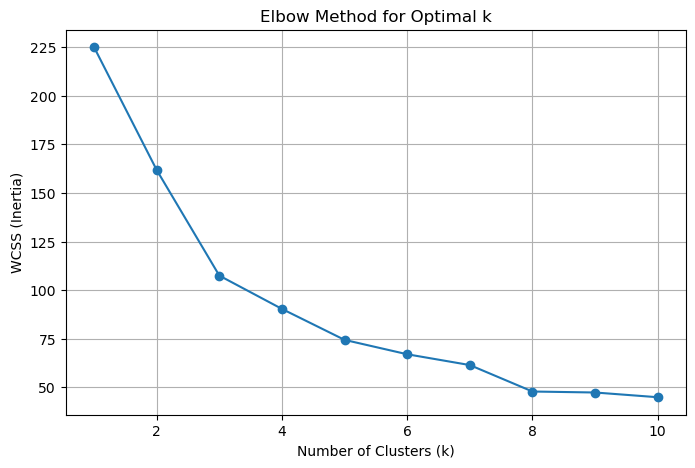

In [30]:
# plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

From the graph we can see k=3 is appropriate because at k=3 the pattern of line changes

In [32]:
kmeans = KMeans(n_clusters=3, random_state=42)  # Try 3 clusters first
store_features['Cluster'] = kmeans.fit_predict(scaled_features)

C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [33]:
store_features['Cluster'] = store_features['Cluster'] + 1

In [34]:
store_features.head()

,Store,Avg_Weekly_Sales,Size,CPI,Unemployment,Fuel_Price,Cluster
0,1,21710.543621,151315,215.995525,7.610918,3.218811,2
1,2,26898.070031,202307,215.651869,7.623279,3.219898,2
2,3,6373.033983,37392,219.402843,7.175602,3.219112,3
3,4,29161.210415,205863,128.680070,6.011862,3.216237,2
4,5,5053.415813,34875,216.576516,6.296549,3.220912,3


We have clustered the stores into 3 clusters

In [36]:
# interpret clusters
store_features.groupby('Cluster').mean()

,Store,Avg_Weekly_Sales,Size,CPI,Unemployment,Fuel_Price
Cluster,,,,,,
1,26.850000,14842.486566,126443.100000,135.687833,8.450356,3.494895
2,17.833333,23301.534848,198411.500000,194.920391,7.425240,3.261891
3,21.846154,9095.845212,73318.615385,205.309044,7.360473,3.245516


Cluster 2 has the highest average weekly sales

In [38]:
store_features.groupby('Cluster')['Store'].count().reset_index()

,Cluster,Store
0,1,20
1,2,12
2,3,13


Cluster 1 has the most stores

K means clustering was done just for the purpose of the practice and how to implement in python but yes it can be used here to understand store segmentation and to group similar stores just as i did but i will not be including any results of k means clustering analysis in the report of analysis.

___